In [1]:
import numpy as np
import scipy as sp
from scipy import linalg
import pylab
import random
import matplotlib.pyplot as plt

In [2]:
def Getdata():    
    x1 = np.loadtxt('dat1.txt')
    x2 = np.loadtxt('dat2.txt')   
    n = np.shape(x1)#n1=n2=n
    x1 = np.reshape(x1,(1,n[0]))
    x2 = np.reshape(x2,(1,n[0]))
    x = np.append(x1, x2,axis=0)
    return n,x

In [3]:
def Whitening(X):
    #normalize X
    mean = X.mean(axis=-1)
    n = np.shape(X)
    for i in range(0,n[0]):
        for j in range(0,n[1]):
            X[i][j] = X[i][j] - mean[i]
    #whitening X to get z
    sigma = np.dot(X,X.T)
    d,E = linalg.eig(sigma)
    D = np.diag(1/d)
    V = np.dot(D,E.T)
    z = np.dot(V,X)
    return z

In [4]:
#show data
def show_data(T, S):
    plt.plot(T, [S[0,i] for i in range(S.shape[1])], marker="*")
    plt.plot(T, [S[1,i] for i in range(S.shape[1])], marker="o")
    plt.show()

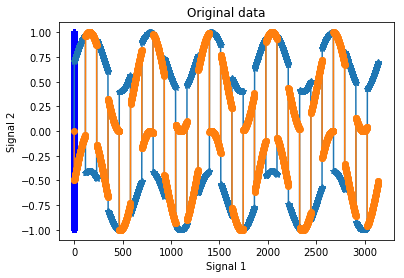

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


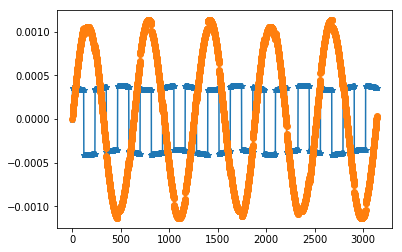

In [5]:
n,x = Getdata()
plt.figure()
plt.plot(x[0], x[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Original data")
T = [i for i in range(0, n[0])]
show_data(T,x)#show x1 & x2
z = Whitening(x)
show_data(T,z)#show z1 & z2

In [6]:
def Decorrelation(W):#W <- (W*W.T)^(-0.5)*W to make W decorrelated
    d, e = linalg.eigh(np.dot(W, W.T))
    return np.dot(np.dot(e * (1. / np.sqrt(d)), e.T), W)

#I try a lot when w is [[ 0.73356777  0.45488916] [ 0.48046912  0.4304221 ]] it can get a good result 
def Gerneratew(z):
    m = np.shape(z)[0]#use random (m,m) to make z 
    n = np.shape(z)[1]
    W = np.random.rand(m,m)
    W[0][0] = 0.7335677
    W[0][1] = 0.45488916
    W[1][0] = 0.48046912 
    W[1][1] = 0.4304221
    print("Now we Generate Good W as",W)
    lim = 200
    for i in range(0,m):
        while lim > 0.0000001:
            W[i] = W[i]/np.linalg.norm(W[i])
            Wold = W
            y = np.dot(W[i][:,np.newaxis],z[0][:, np.newaxis].T)
            W[i] = (z[i] * pow(y[0],3)).mean(axis=-1) - 3*W[i]
            W[i] = W[i]/np.linalg.norm(W[i])
            W = Decorrelation(W)
            lim = max( abs(abs(np.dot(W[i],Wold[i][:,np.newaxis])) - 1) )#vdo
    lim = 200
    while lim > 0.0001:
        Wold = W
        W = Decorrelation(W)
        lim = max( abs(abs(np.diag(np.dot(W, Wold.T))) - 1) )

    print("We did it!!!")    
    return W

In [7]:
W = Gerneratew(z)

Now we Generate Good W as [[ 0.7335677   0.45488916]
 [ 0.48046912  0.4304221 ]]
We did it!!!


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


In [8]:
y = np.dot(W,z)

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


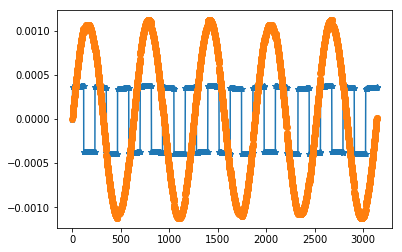

In [9]:
show_data(T,y)

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


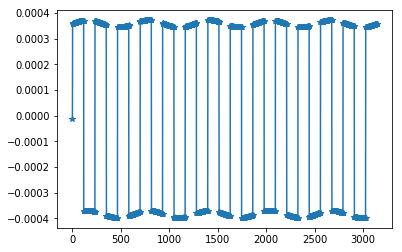

In [10]:
plt.plot(T, [y[0,i] for i in range(y.shape[1])], marker="*")
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


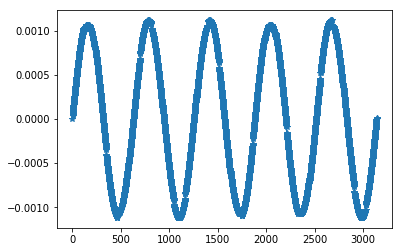

In [11]:
plt.plot(T, [y[1,i] for i in range(y.shape[1])], marker="*")
plt.show()